In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import random
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
name = "pid_day1_2"
root_folder = "/Users/paola/OneDrive - Universiteit Antwerpen/DAEMON/Dynasim/experiments/paper/nokia_results"
os.chdir(root_folder)
test_traces = name + ".csv"

print(test_traces)

pid_day1_2.csv


In [3]:
nokia_results = pd.read_csv(test_traces)

In [4]:
nokia_results

,Unnamed: 0,work,VNFs,cpu,overflow,latency
0,0,4.886667,2,0.0000,0.0000,0.0033
1,1,4.923333,2,0.6667,0.0000,0.0083
2,2,4.976667,2,1.0000,1.4433,0.0239
3,3,4.876667,3,0.6667,1.9367,0.0399
4,4,4.913333,3,1.0000,2.5956,0.0484
...,...,...,...,...,...,...
172795,172795,5.036667,5,1.0000,0.2447,0.0168
172796,172796,5.036667,5,1.0000,0.2447,0.0168
172797,172797,5.036667,5,1.0000,0.2447,0.0168
172798,172798,5.036667,5,1.0000,0.2447,0.0168


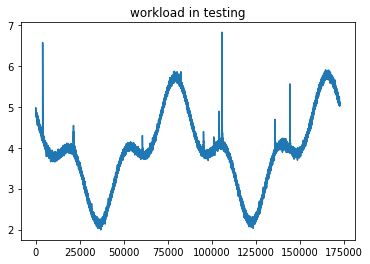

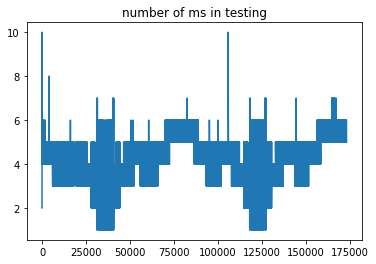

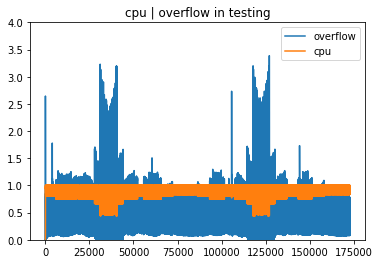

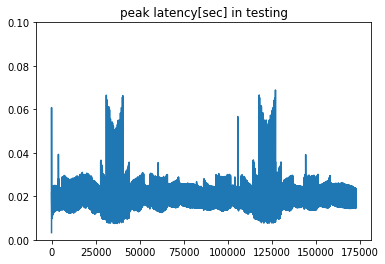

In [5]:
# test figures
# --------------- workload ------------------------------
plt.figure()
plt.plot(nokia_results["work"])
plt.title("workload in testing")
# plt.savefig('./workload_test.png', dpi=300)
plt.show()

# --------------- num ms ------------------------------
plt.figure()
plt.plot(nokia_results["VNFs"])
plt.title("number of ms in testing")
# plt.savefig('./ms_test.png', dpi=300)
plt.show()

# --------------- cpu|overflow ------------------------------
plt.figure()
plt.plot(nokia_results["overflow"], label="overflow")
plt.plot(nokia_results["cpu"], label="cpu")
plt.ylim([0, 4])
plt.title("cpu | overflow in testing")
plt.legend()
# plt.savefig('./cpu_overflow_test.png', dpi=300)
plt.show()

# --------------- peak latency ------------------------------
plt.figure()
plt.plot(nokia_results["latency"])
plt.ylim([0, 0.1])
plt.title("peak latency[sec] in testing")
# plt.savefig('./peak_latency_test.png', dpi=300)
plt.show()

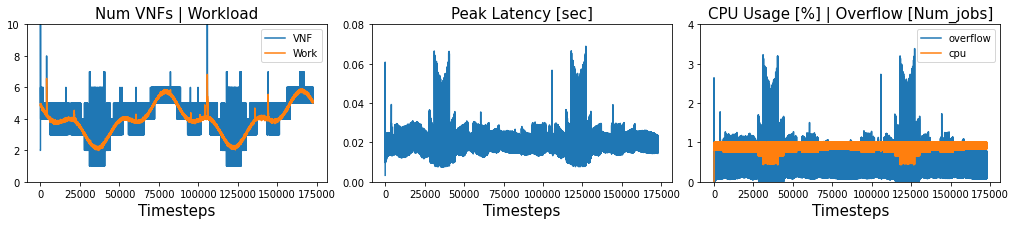

In [6]:
# plots for paper
fontsize=15

fig = plt.figure(constrained_layout=True, figsize=(14,3))
gs = GridSpec(1, 3, figure=fig)
#
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(nokia_results["VNFs"], label='VNF')
ax1.plot(nokia_results["work"], label='Work')
ax1.set_ylim([0, 10])
ax1.set_title('Num VNFs | Workload', fontsize=fontsize)
ax1.set_xlabel('Timesteps', fontsize=fontsize)
ax1.legend()
# 
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(nokia_results["latency"], label='peak_lat')
ax2.set_ylim([0, 0.08])
ax2.set_xlabel('Timesteps', fontsize=fontsize)
ax2.set_title('Peak Latency [sec]', fontsize=fontsize)
# 
ax3 = fig.add_subplot(gs[0, 2])
ax3.plot(nokia_results["overflow"], label='overflow')
ax3.plot(nokia_results["cpu"], label='cpu')
ax3.set_ylim([0, 4])
ax3.set_xlabel('Timesteps', fontsize=fontsize)
ax3.set_title('CPU Usage [%] | Overflow [Num_jobs]', fontsize=fontsize)
ax3.legend()

plt.savefig(f'./results_{name}_paper.pdf', dpi=300)
plt.show()

In [7]:
data = nokia_results.drop(["Unnamed: 0", "work", "cpu", "overflow"], axis=1)
print(data.describe())

                VNFs        latency
count  172800.000000  172800.000000
mean        4.056412       0.019806
std         1.090880       0.004780
min         1.000000       0.003300
25%         3.000000       0.016300
50%         4.000000       0.019400
75%         5.000000       0.022800
max        10.000000       0.068900


In [8]:
# SLO Violations
max_latency = 0.024
peak = nokia_results["latency"]
total_slo_measurements = len(peak)
peak = peak[peak>max_latency]
total_slo_violations = len(peak)
print(f"Total of SLO violations: {total_slo_violations}")
perc_slo_violations = total_slo_violations/total_slo_measurements
print(f"Percentage of SLO violations: {perc_slo_violations:2.2%}")

Total of SLO violations: 28641
Percentage of SLO violations: 16.57%


In [9]:
nokia_results.loc[nokia_results['latency'] > max_latency, 'slo_violation'] = 1.0
nokia_results.loc[nokia_results['latency'] <= max_latency, 'slo_violation'] = 0.0
nokia_results[nokia_results.slo_violation==1.0].count()

Unnamed: 0       28641
work             28641
VNFs             28641
cpu              28641
overflow         28641
latency          28641
slo_violation    28641
dtype: int64

In [10]:
nokia_results['counter'] = nokia_results['slo_violation'].diff().ne(0).cumsum()

In [11]:
df2 = nokia_results.groupby('counter')['slo_violation'].min().to_frame(name='value').join(nokia_results.groupby('counter')['slo_violation'].count().rename('number'))
max_consec0 = df2[df2['value']==0]['number'].tolist()
max_consec1 = df2[df2['value']==1]['number'].tolist()

Text(0, 0.5, 'p')

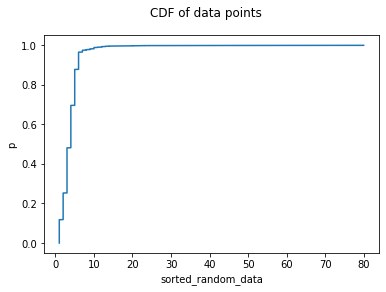

In [12]:
import matplotlib.pyplot as plt
import numpy

# data = numpy.random.randn(1000)
# print("The data is-",data)
sorted_random_data = numpy.sort(max_consec1)
p = 1. * numpy.arange(len(sorted_random_data)) / float(len(sorted_random_data) - 1)
# print("The CDF result is-",p)

fig = plt.figure()
fig.suptitle('CDF of data points')
ax2 = fig.add_subplot(111)
ax2.plot(sorted_random_data, p)
ax2.set_xlabel('sorted_random_data')
ax2.set_ylabel('p')